In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


My goal is to figure out which of the following factors contibute most to job satisfaction

In [2]:
# Reads in data and creates a data frame from it
data = pd.read_csv("../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check how much data we have

data.shape

(1470, 35)

In [4]:
# Checking for NULL values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No NULL values

Here we can also see all the columns we have- we can start removing non-sensical data such as "EmployeeNumber" and "Employee Count"

In [5]:
data = data.drop(columns = ["EmployeeNumber", "EmployeeCount"])

Here I will check for additional unnecessary data by looking for categories with no unique values

In [6]:
data.nunique().sort_values()

Over18                         1
StandardHours                  1
OverTime                       2
PerformanceRating              2
Gender                         2
Attrition                      2
BusinessTravel                 3
MaritalStatus                  3
Department                     3
StockOptionLevel               4
EnvironmentSatisfaction        4
WorkLifeBalance                4
RelationshipSatisfaction       4
JobInvolvement                 4
JobSatisfaction                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate 

In [7]:
data = data.drop(columns = ["Over18", "StandardHours"])

Checking for unreasonable data by looking for outliers

In [8]:
data.min()

Age                                                18
Attrition                                          No
BusinessTravel                             Non-Travel
DailyRate                                         102
Department                            Human Resources
DistanceFromHome                                    1
Education                                           1
EducationField                        Human Resources
EnvironmentSatisfaction                             1
Gender                                         Female
HourlyRate                                         30
JobInvolvement                                      1
JobLevel                                            1
JobRole                     Healthcare Representative
JobSatisfaction                                     1
MaritalStatus                                Divorced
MonthlyIncome                                    1009
MonthlyRate                                      2094
NumCompaniesWorked          

In [9]:
data.max()

Age                                           60
Attrition                                    Yes
BusinessTravel                     Travel_Rarely
DailyRate                                   1499
Department                                 Sales
DistanceFromHome                              29
Education                                      5
EducationField                  Technical Degree
EnvironmentSatisfaction                        4
Gender                                      Male
HourlyRate                                   100
JobInvolvement                                 4
JobLevel                                       5
JobRole                     Sales Representative
JobSatisfaction                                4
MaritalStatus                             Single
MonthlyIncome                              19999
MonthlyRate                                26999
NumCompaniesWorked                             9
OverTime                                     Yes
PercentSalaryHike   

Looking at the data, daily rate, hourly rate, monthly income, and monthly rate do not seem to line up.

array([[<AxesSubplot:xlabel='HourlyRate', ylabel='HourlyRate'>,
        <AxesSubplot:xlabel='DailyRate', ylabel='HourlyRate'>,
        <AxesSubplot:xlabel='MonthlyRate', ylabel='HourlyRate'>],
       [<AxesSubplot:xlabel='HourlyRate', ylabel='DailyRate'>,
        <AxesSubplot:xlabel='DailyRate', ylabel='DailyRate'>,
        <AxesSubplot:xlabel='MonthlyRate', ylabel='DailyRate'>],
       [<AxesSubplot:xlabel='HourlyRate', ylabel='MonthlyRate'>,
        <AxesSubplot:xlabel='DailyRate', ylabel='MonthlyRate'>,
        <AxesSubplot:xlabel='MonthlyRate', ylabel='MonthlyRate'>]],
      dtype=object)

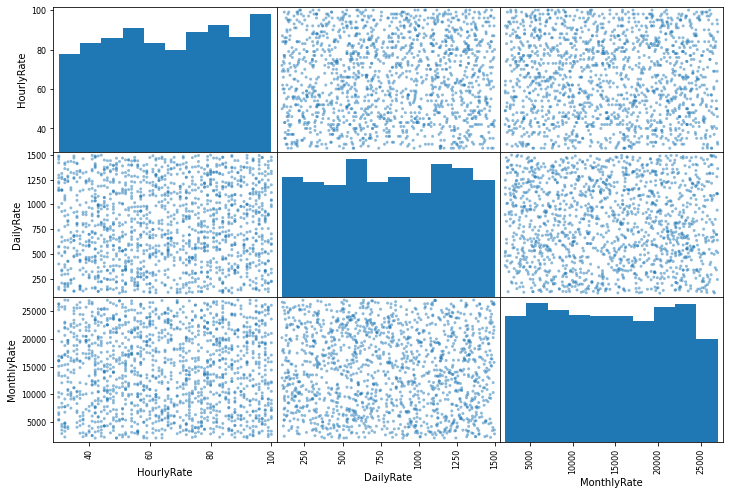

In [10]:
import matplotlib.pyplot as plt

"""
plt.scatter(data["DailyRate"], data["HourlyRate"])
plt.ylabel('Daily Rate')
plt.xlabel('Hourly Rate')
plt.suptitle('Daily vs Hourly Rate')
plt.show()

plt.figure()
plt.scatter(data["MonthlyRate"], data["DailyRate"])
plt.ylabel('Monthly Rate')
plt.xlabel('Daily Rate')
plt.suptitle('Monthly vs Daily Rate')
plt.show()

plt.figure()
plt.scatter(data["MonthlyRate"], data["HourlyRate"])
plt.ylabel('Monthly Rate')
plt.xlabel('Hourly Rate')
plt.suptitle('Monthly vs Hourly Rate')
plt.show()
"""

from pandas.plotting import scatter_matrix

attributes = ["HourlyRate", "DailyRate", "MonthlyRate"]
scatter_matrix(data[attributes], figsize=(12, 8))

Daily, Hourly, and Monthly rate should be highly correlated, but they are not so. Thus, I will remove them.

In [11]:
data = data.drop(columns = ["HourlyRate", "DailyRate", "MonthlyRate"])

Now I am curious about monthly income. I assume it is seperate from rate and will check to see if values are reasonable.

(array([ 28., 206., 199., 122., 159., 147.,  90.,  87.,  40.,  35.,  34.,
         47.,  53.,  17.,  15.,   9.,  37.,   8.,   8.,   8.,  24.,  22.,
         15.,  27.,  33.]),
 array([ 1009. ,  1768.6,  2528.2,  3287.8,  4047.4,  4807. ,  5566.6,
         6326.2,  7085.8,  7845.4,  8605. ,  9364.6, 10124.2, 10883.8,
        11643.4, 12403. , 13162.6, 13922.2, 14681.8, 15441.4, 16201. ,
        16960.6, 17720.2, 18479.8, 19239.4, 19999. ]),
 <BarContainer object of 25 artists>)

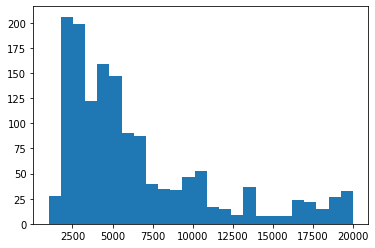

In [12]:
plt.hist(data["MonthlyIncome"], 25)

In [13]:
data["MonthlyIncome"].min()

1009

In [14]:
data["MonthlyIncome"].max()

19999

There are a lot of low incomes with a minimum of 1,009 a month, only 12,108 a year. Let's see if this data makes sense.

In [15]:
pd.set_option('display.max_columns', None)
data[data.eq(1009).any(1)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
513,20,Yes,Travel_Rarely,Research & Development,10,1,Medical,4,Male,3,1,Research Scientist,3,Single,1009,1,Yes,11,3,4,0,1,5,3,1,0,1,1


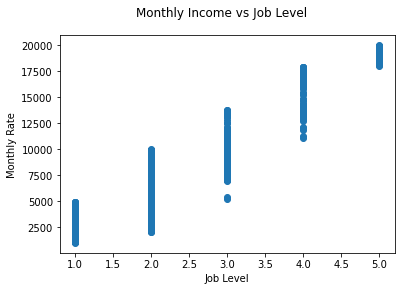

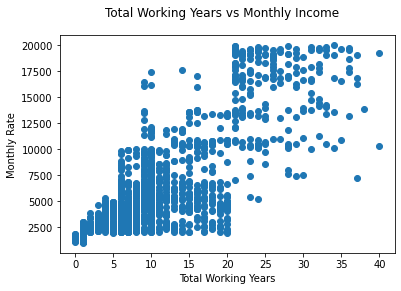

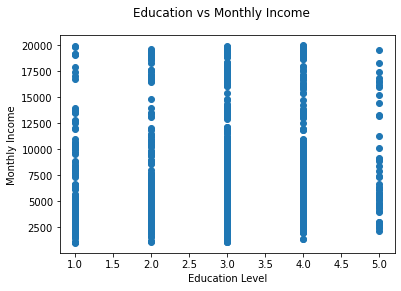

In [16]:
plt.scatter(data["JobLevel"], data["MonthlyIncome"])
plt.ylabel("Monthly Rate")
plt.xlabel("Job Level")
plt.suptitle("Monthly Income vs Job Level")
plt.show()

plt.scatter(data["TotalWorkingYears"], data["MonthlyIncome"])
plt.ylabel("Monthly Rate")
plt.xlabel("Total Working Years")
plt.suptitle("Total Working Years vs Monthly Income")
plt.show()

plt.scatter(data["Education"], data["MonthlyIncome"])
plt.ylabel("Monthly Income")
plt.xlabel("Education Level")
plt.suptitle("Education vs Monthly Income")
plt.show()

Recall that everyones standard hours were 80 per week (data was removed). While this seemes to contradict the income data as it would be below minimum wage, keep in mind this data is made up. I will assume the standard hours is erroneous while the income is correct. For the outlier, other data points such as 1 year of experience and under college-level education line up with the low wages. Perhaps this individual worked part time.

Education Level does not seem to be correlated with income, though it seems ok as Total Working Years and Job Level are, which are more logical. The data is suggesting one can overcome a lack of education through work experience.

I will begin to find which factors correlate most to job satisfaction.

I have some written data I would like to change to numerical values for easier analysis.

In [17]:
data["EducationField"].unique() # to help with encoding below

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [18]:
data["JobRole"].unique() # to help with encoding below

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [19]:
data["Attrition"] = data["Attrition"].replace(["Yes", "No"],[1,0])
data["BusinessTravel"] = data["BusinessTravel"].replace(["Non-Travel", "Travel_Rarely","Travel_Frequently"], [0,1,2])

# Having 3 departments will not work, so I will split them into two
data["Department"] = data["Department"].replace(["Human Resources", "Sales","Research & Development"], [0,0,1])

# 6 education fields will not work, so I will split them into more sciencey and humanities based studies
data["EducationField"] = data["EducationField"].replace(["Life Sciences", "Medical", "Technical Degree", "Other", "Human Resources", "Marketing"], [1, 1, 1, 0, 0, 0])

data["Gender"] = data["Gender"].replace(["Female", "Male"], [0,1])

# 9 job roles are too many, split into techincal vs softer roles

data["JobRole"] = data["JobRole"].replace(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'], [0,1, 1, 1, 0, 0, 0, 1, 0])
                                        
# 3 categories won't work, so i'll combined single and divorced
data["MaritalStatus"] = data["MaritalStatus"].replace(["Single", "Married", "Divorced"], [0,1, 0])

data["OverTime"] = data["OverTime"].replace(["Yes", "No"], [1,0])

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,0,1,2,1,2,0,3,2,0,4,0,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,1,8,1,1,3,1,2,2,1,2,1,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1,2,2,0,4,1,2,1,1,3,0,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1,3,4,1,4,0,3,1,1,3,1,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,1,2,1,1,1,1,3,1,1,2,1,3468,9,0,12,3,4,1,6,3,3,2,2,2,2


In [20]:
grouped_data = data.groupby(data["JobSatisfaction"])
grouped_data.size()

JobSatisfaction
1    289
2    280
3    442
4    459
dtype: int64

The distribution of job satisfaction ratings seem reasonable.

In [21]:
grouped_data.mean()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,36.916955,0.228374,1.096886,0.664360,9.190311,2.944637,0.809689,2.743945,0.588235,2.761246,2.055363,0.522491,0.449827,6561.570934,2.871972,0.290657,15.231834,3.166090,2.730104,0.788927,11.608997,2.816609,2.771626,6.989619,4.276817,2.314879,4.384083
2,36.985714,0.164286,1.071429,0.621429,9.103571,2.896429,0.771429,2.764286,0.578571,2.728571,2.075000,0.532143,0.467857,6527.328571,2.839286,0.246429,15.117857,3.153571,2.735714,0.800000,11.360714,2.839286,2.767857,7.107143,4.135714,2.200000,4.075000
3,37.022624,0.165158,1.067873,0.678733,9.418552,2.914027,0.857466,2.651584,0.590498,2.726244,2.074661,0.545249,0.479638,6480.495475,2.667421,0.273756,15.013575,3.126697,2.696833,0.762443,11.106335,2.742081,2.782805,7.004525,4.285068,2.138009,4.033937
4,36.795207,0.113290,1.106754,0.642702,9.030501,2.901961,0.812636,2.749455,0.629630,2.714597,2.052288,0.511983,0.435730,6472.732026,2.516340,0.309368,15.440087,3.172113,2.701525,0.823529,11.189542,2.819172,2.729847,6.962963,4.202614,2.148148,4.074074


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


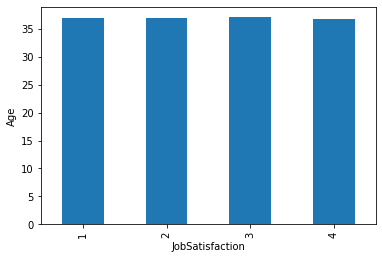

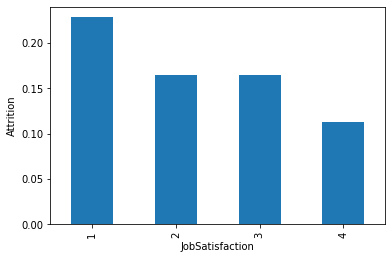

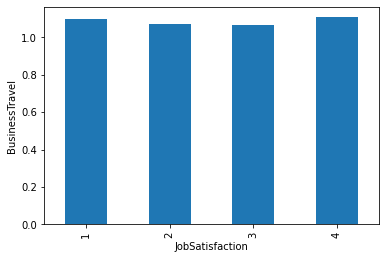

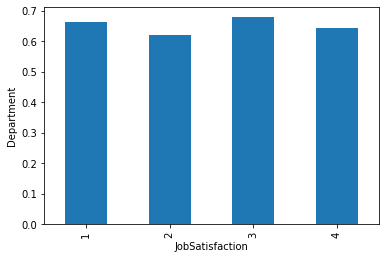

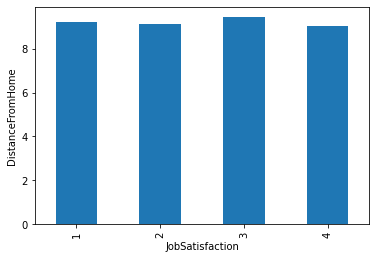

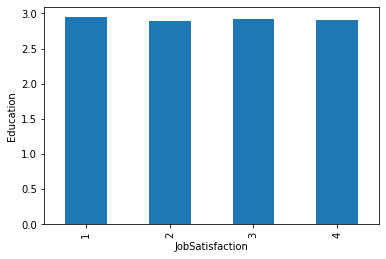

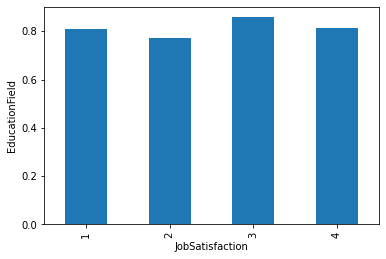

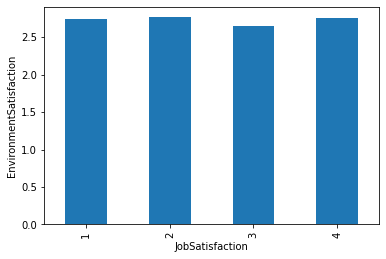

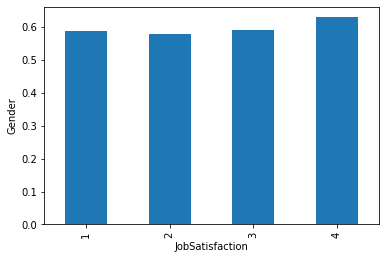

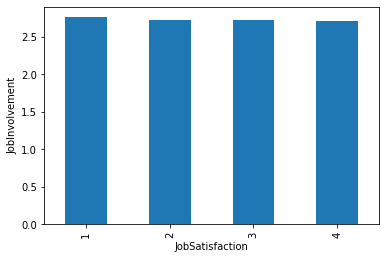

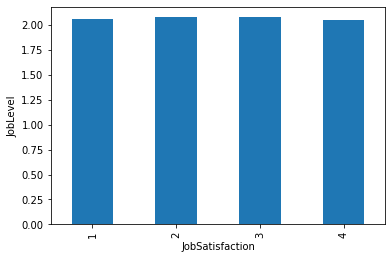

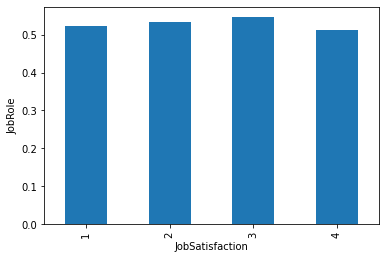

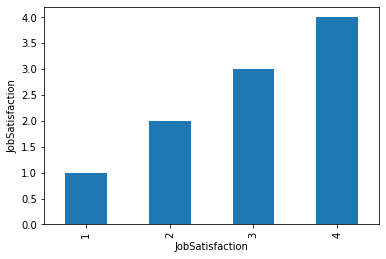

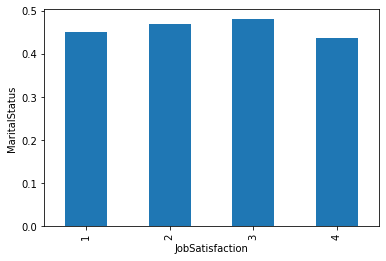

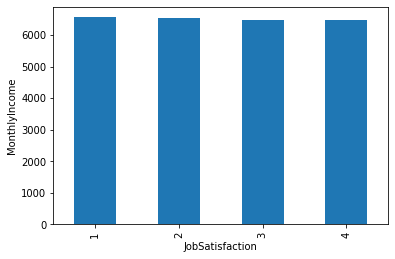

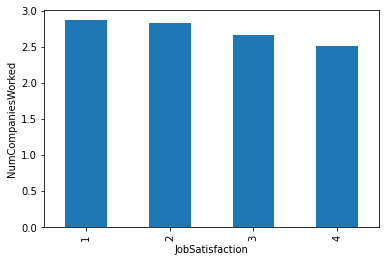

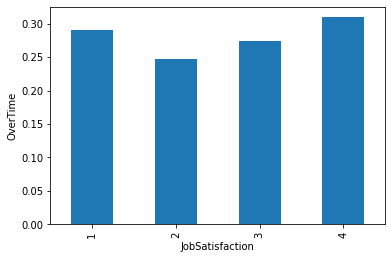

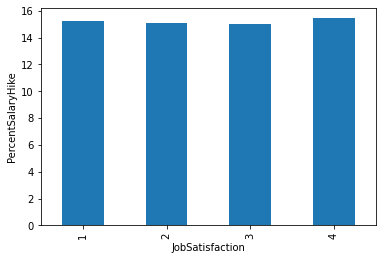

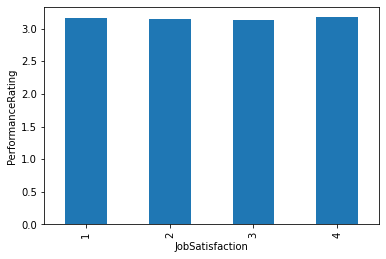

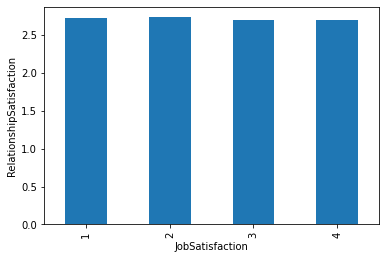

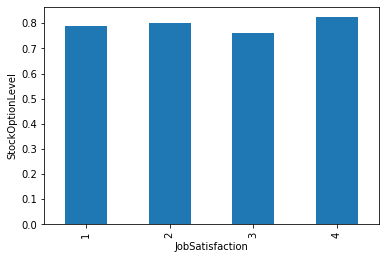

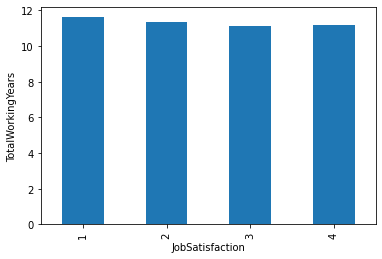

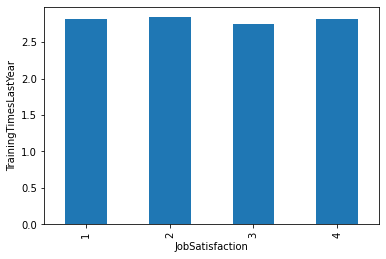

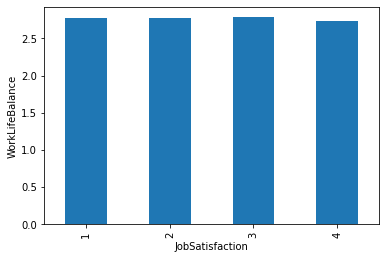

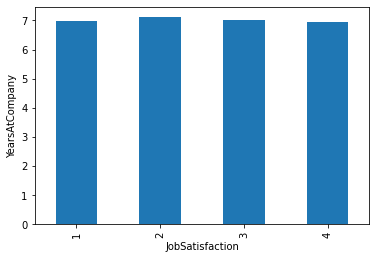

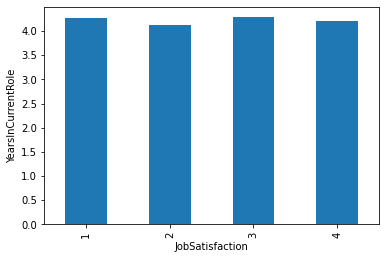

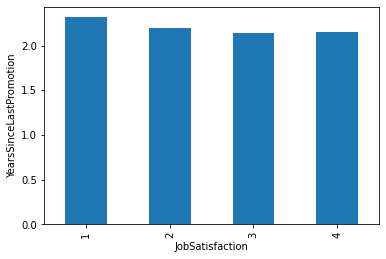

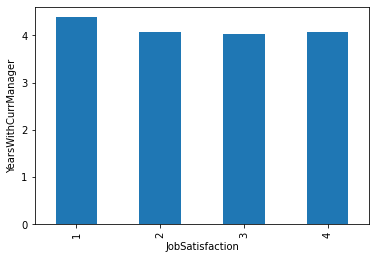

In [22]:
for col_name in data:
    """
    plt.scatter(data['JobSatisfaction'], data[col_name])
    plt.xlabel("JobSatisfaction")
    plt.ylabel(col_name)
    plt.suptitle(col_name + " vs Job Satisfaction")
    plt.show()
    """
    plt.subplots()
    grouped_data[col_name].mean().plot(kind='bar', ylabel = col_name)

There seem to be many factors that contribute slightly to satisfaction such as job involvemnet or years since last promotion.

In [23]:
"""
from sklearn.metrics import r2_score
from collections import OrderedDict

r2_values = OrderedDict()
for col_name in data:
    r2_values[col_name] = r2_score(data["JobSatisfaction"], data[col_name]).round(decimals = 2)
    
r2_data = pd.DataFrame(r2_values.values(), r2_values.keys(), columns = ["R2 value"])
r2_data["R2 value"]
display(r2_data)
"""

# Pandas does not seem to have a good way to calculate r^2 from linear regression

import numpy as np
from sklearn.linear_model import LinearRegression 
from collections import OrderedDict

r2_values = OrderedDict()
x = np.array(data['JobSatisfaction']).reshape(-1,1)
for col_name in data:
    y = np.array(data[col_name]).reshape(-1,1)
    reg = LinearRegression() 
    reg.fit(x,y)
    r2 = reg.score(x,y)
    r2_values[col_name] = reg.score(x, y)
    
r2_data = pd.DataFrame(r2_values.values(), r2_values.keys(), columns = ["R2 value"])
r2_data["R2 value"]
display(r2_data)

,R2 value
Age,0.000024
Attrition,0.010708
BusinessTravel,0.000075
Department,0.000008
DistanceFromHome,0.000013
Education,0.000128
EducationField,0.000595
EnvironmentSatisfaction,0.000046
Gender,0.001106
JobInvolvement,0.000461


Unfortunatly, though there may be slight correlations none have statistical significance, except perhaps attrition. Many deviations can be attritubted to natural variation. Corporations should pay attention to job satisfaction as it is one of the leading factors of attirtion.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Attrition'>

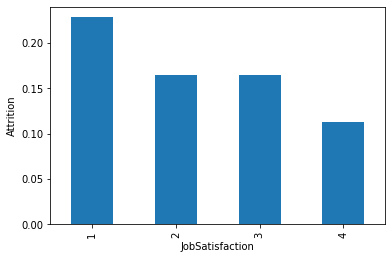

In [24]:
grouped_data["Attrition"].mean().plot(kind='bar', ylabel ="Attrition")

It appears those with a job satisfaction of 1 are twice as likely to quit as those with a rating of 4.